# Project Oasis

For this project, We'll be following the **Cross-Industry Process for Data Mining** aka **CRISP DM Methology** which is known for a structured approach on handling data mining projects. In the below table are the coverages of the each of its subprocesses.


<img src="image/crispdm.png" width="1000" align="left">

## I. Business Understanding
In this initial stage, we want to understand what we want to accomplish from a business perspective. Understanding the background of the problem at hand and assessing the business current situation are essential steps for us to align the objectives in aiding the identified painful area of the business.

   ### A. Background

Business manager of a consumer credit card portfolio of a bank is facing severe customer attrition problem in the recent months. This is impacting the business. The business manager wants to leverage the power of data analytics to understand the primary reasons of attrition. She also wants to have an ability to understand the customers who are likely to close their accounts with the bank in near future, so that she can focus her efforts, well in advance to retain those customers.


   ### B. Objective

Build a classification model to predict if a customer will close his account with the bank or not.




## II. Data Understanding
The second stage of the CRISP-DM process requires us to collect and understand the data or resources we can play at hand. Note that this step includes data loading, data generation, comprehension of data definition, and understanding the data statistically a.k.a. exploratory data analysis.

### A. Data Source

https://www.kaggle.com/sakshigoyal7/credit-card-customers

  
  ### B.  Data Dictionary
  This provides the definition of the data to be used for analysis and modelling. Note that our data understanding definition will be limited to this since we just got it from Kaggle. 
  #### Input Variables
  These are also known as the independent variables/features that we'll be utilizing to predict the target variable.
  
  ##### Numerical Features
  These are the variables represented by continuous numbers.
1. **Customer_Age** (Num): Demographic variable - Customer's Age in Years
2. **Dependent_count** (Num): Demographic variable - Number of dependents
3. **Months_on_book** (Num): Months on book (Time of Relationship)
4. **Total_Relationship_Count** (Num): Total no. of products held by the customer
5. **Months_Inactive_12_mon** (Num): No. of months inactive in the last 12 months
6. **Contacts_Count_12_mon** (Num): No. of contacts in the last 12 months
7. **Credit_Limit** (Num): Credit Limit on the Credit Card
8. **Total_Revolving_Bal** (Num): Total Revolving Balance on the Credit Card. Note: a *revolving balance is the portion of credit card spending that goes unpaid at the end of a billing cycle.*
9. **Avg_Open_To_Buy** (Num): Open to Buy Credit Line (Average of last 12 months) Note: *The difference between the credit limit assigned to a cardholder account and the present balance on the account.*
10. **Total_Amt_Chng_Q4_Q1** (Num): Change in Transaction Amount (Q4 over Q1) 
11. **Total_Trans_Amt** (Num): Total Transaction Amount (Last 12 months)
12. **Total_Trans_Ct** (Num): Total Transaction Count (Last 12 months)
13. **Total_Ct_Chng_Q4_Q1** (Num): Change in Transaction Count (Q4 over Q1) 
14. **Avg_Utilization_Ratio** (Num): Average Card Utilization Ratio

##### Categorical Features 
These are the variables represented by text or characters.
  
1. **Gender** (Char): Demographic variable - M=Male, F=Female
2. **Education_Level** (Char): Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
3. **Marital_Status** (Char): Demographic variable - Married, Single, Unknown
4. **Income_Category** (Char): Demographic variable - Annual Income Category of the account holder ('< $40K', '$40K - 60K', '$60K - $80K', '$80K-$120K', '> $120K', 'Unknown')
5. **Card_Category** (Char): Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

#### Target Variable
This is also known as the dependent/output variable that we'll be trying to predict using the input variables that will be fitted to a classification model.

1. **Attrition_Flag** - Internal event (customer activity) variable - if the account is closed then 1 else 0 (binary: 1,0)



### C. Exploratory Data Analysis

In this analysis, we'll try to explore and understand the given data set using different methods such as investigating the summary statistics, checking the data distribution, charting of features, etc.. This is done for us to check if there are patterns or relationships within the features and target variable that we'll be using before model building.


#### 1. Read CSV Data

In [2]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [59]:
data = pd.read_csv('BankChurners.csv')
data['Attrition_Flag'] = [0 if i == "Existing Customer" else 1 for i in data['Attrition_Flag']]
data.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1, inplace = True)
numerical = ['Customer_Age', 
       'Dependent_count',  'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
categorical = ['Gender','Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category']
target  = ['Attrition_Flag']

Our data is in comma-separated values (CSV) format and we'll be using **Pandas** library to read the file. Upon reading the file, below are the highlights:
* Most of the numerical features are related to how the user is utilizing the credit card product.
* Most of the categorical features are related to the demographics of customers.

#### 2. Check Dimension and Missing Values

In [210]:
#Check dimension
print('Independent Features Dimension: ', data[numerical+categorical].shape)
print('Target Variable Dimension: ', data['Attrition_Flag'].shape)

Independent Features Dimension:  (10127, 19)
Target Variable Dimension:  (10127,)


The output above enclosed in parenthesis *(1st, 2nd)* is the dimension of the given data where the 1st and 2nd elements represent the count of rows and columns, respectively. Note that if the value is blank, it means 1 row or column. We output the dimension to make sure that our numerical features and target variable are the same as they should be. The follow are the highlights of the output above:
* Dataset is comprised of 10127 customers and 19 features (14 numerical and 5 categorical features)
* We're able to check that both independent and dependent features have the same count of rows.

In [212]:
#Check if there are missing values
data[numerical+categorical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Dependent_count           10127 non-null  int64  
 2   Months_on_book            10127 non-null  int64  
 3   Total_Relationship_Count  10127 non-null  int64  
 4   Months_Inactive_12_mon    10127 non-null  int64  
 5   Contacts_Count_12_mon     10127 non-null  int64  
 6   Credit_Limit              10127 non-null  float64
 7   Total_Revolving_Bal       10127 non-null  int64  
 8   Avg_Open_To_Buy           10127 non-null  float64
 9   Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 10  Total_Trans_Amt           10127 non-null  int64  
 11  Total_Trans_Ct            10127 non-null  int64  
 12  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 13  Avg_Utilization_Ratio     10127 non-null  float64
 14  Gender

The table above basically shows the high-level information of the given dataset with respect to (1) Column, (2) Non-Null Count, and (3) Dtype. **Column** is just the assigned feature name based on the data source. The **Non-Null Count** represents the count of non-missing values which is compared to the count of rows/ entries that be be shown on the 2nd row of the ouput above at RangeIndex. Take note that once there are missing values, necessary methods are needed to fix them as machine algorithm cannot take null values as input. Lastly, the **Dtype** represents the type of data where numerical are usually integer and float. Based on the table above, the following are the highlights:
* All features have no missing values which means no need for data imputation or fixing of missing values in the given data set.
* The data types of our features are 5 object, 5 float and 9 integer types.

#### 3. Check Summary Statistics


In [213]:
#Quick Check Descriptive and Quantile statistics
data[numerical+categorical].describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


The table above shows the summary statistics of the numerical features. On the first column are the numerical features of the given dataset while the header values are the 8 summary statistics covering the 2nd up to the last column. Each row pertains to the summary statistics of the each feature. Below are their definitions: 
* **count** represents the number of non-missing values. This should be consistent among features.
* **mean** is the average or center value of the features.
* **std** which stands as standard deviation tells how far are the value for the mean or average. The higher the value the more dispersed our data is.
* **min** is the minimum value among our data.
* **25%** is the 25th percentile which is the value at which 25% of the observations lie below that value, and 75% of the observations lie above that value. 
* **50%** is the 50th percentile a.k.a Median which is the center of the values and considered robust if extreme values are present in the data. 
* **75%** is the 75th percentile which is the value at which 75% of the observations lie below that value, and 25% of the observations lie above that value.
* **Max** is the maximum value among our data. This can be the basis of the extreme values.

Based on the table above, below are the highlights: 

* For the age of the customers, the average age is 46 yrs old which make sense since the product is offered to established working age bracket. 
* For the months on book, on the average, customers already have the credit card product for 36 months or 3 years which is quite long for a credit card user.
* On the average, customers are inactive on using credit card for 3 months.
* Given the 75th percentile and maximum values of *Total_Amt_Chng_Q4_Q1 and Total_Ct_Chng_Q4_Q1, Credit_Limit, Avg_Open_To_Buy*, it seems that there are outliers that needed to be investigated further.


#### 4. Understanding our Target Variable

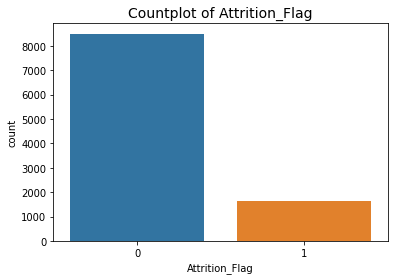

In [7]:
#countplot of our target variable
sns.countplot(x="Attrition_Flag", data=data[target])
plt.title('Countplot of Attrition_Flag', fontsize = 14)
plt.show()
#print(data[target]['Attrition_Flag'].value_counts())

The above chart shows the countplot of our target variable named **Attrition_Flag**. The x-axis represents the two unique values in our target variable where 1 stands for customer who closed their credit card account while 0 means otherwise. The y-axis represents the count of customers falling for each customer type. Based on the above chart, we have 8500 customer who didn't close their acccount and 1627 customers who closed their account. 

#### 5.  Univariate Analysis on Numerical Features
**Univariate Analysis** is the simplest form of analyzing data which concerns only one data to be analyzed at a time. The basic goal is to describe a single feature thru patterns from charting and understanding its summary statistics. 

Here, we'll be investigating the distribution of the top features using a **histogram**. Below is the guide on how histogram is constructed from a data set.

<img src="image/hist.png" width="500" align="left">

<br />
<br />
<br />

**Histogram** provides a visual interpretation of numerical data by indicating the number of data points falling within a range of values called bin. The higher the bar is, the higher the count of data values falling in that bin.


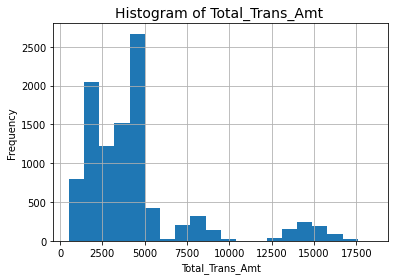

In [8]:
#Total_Trans_Amt
data['Total_Trans_Amt'].hist(bins = 20)
plt.xlabel('Total_Trans_Amt')
plt.ylabel('Frequency')
plt.title('Histogram of Total_Trans_Amt ',fontsize = 14)
plt.show()
#data[['Total_Trans_Amt']].describe().T


The figure above shows the histogram of the feature **Total_Trans_Amt** (Total Transaction Amount). The x-axis represents the grouped values or binned ranges of the numerical feature while the y-axis represents the frequency or the count of customers falling per binned range. As we can see, between 500 and 5000 is where the tallest bars are in which means the most of the customers' total transaction amount is falling in this range. It can also be seen that the the peak is at 5000. 

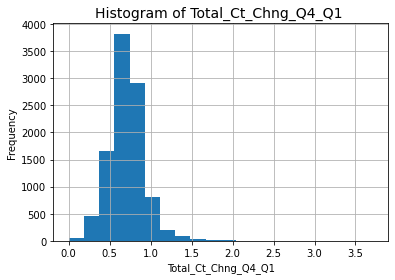

,count,mean,std,min,25%,50%,75%,max
Total_Ct_Chng_Q4_Q1,10127.0,0.712222,0.238086,0.0,0.582,0.702,0.818,3.714


In [9]:
#Total_Ct_Chng_Q4_Q1
data['Total_Ct_Chng_Q4_Q1'].hist(bins = 20)
plt.xlabel('Total_Ct_Chng_Q4_Q1')
plt.ylabel('Frequency')
plt.title('Histogram of Total_Ct_Chng_Q4_Q1 ',fontsize = 14)
plt.show()
data[['Total_Ct_Chng_Q4_Q1']].describe().T

The figure above shows the histogram of the feature **Total_Ct_Chng_Q4_Q1** (Total Transaction Count Change from Q1 to Q4). The x-axis represents the grouped values or binned ranges of the numerical feature while the y-axis represents the frequency or the count of customers falling per binned range. As we can see in the histogram, between 0.5 and 0.8 is where the tallest bars are in which means the total transaction count change from Q1 to Q4 is falling in this range. It can also be seen that the peak is at 0.71 which means that bulk of customers have transaction count from Q1 to Q4 by 30%. The computation of the % decrease is (1 -  mean) x 100.


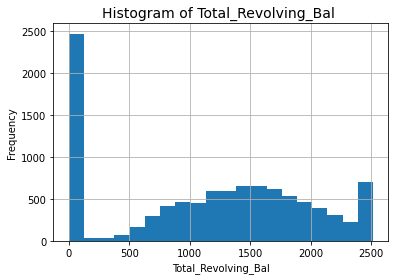

,count,mean,std,min,25%,50%,75%,max
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.0,1276.0,1784.0,2517.0


In [10]:
#Total_Revolving_Bal

data['Total_Revolving_Bal'].hist(bins = 20)
plt.xlabel('Total_Revolving_Bal')
plt.ylabel('Frequency')
plt.title('Histogram of Total_Revolving_Bal ',fontsize = 14)
plt.show()
data[['Total_Revolving_Bal']].describe().T

The chart above shows the histogram of the feature **Total_Revolving_Bal** (Total Revolving Balance). The x-axis represents the grouped values or binned ranges of the numerical feature while the y-axis represents the frequency or the count of customers falling per binned range.  It can be seen that the peak is at 0 which means that bulk of customers have a zero revolving balance. For the remainder of the customers having non-zero revolving balance, the center of the bars is around 1500.

#### 6.  Univariate Analysis on Categorical Features

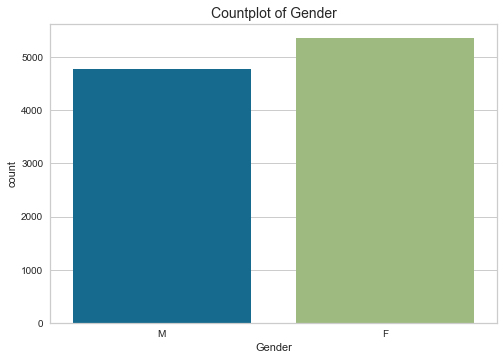

In [232]:
sns.countplot(x = 'Gender', data = data)
plt.title('Countplot of Gender', fontsize = 14)
plt.show()


The above chart shows the countplot of feature named **Gender**. The x-axis represents the two unique classes in this feature where **M** stands for Male while **F** stands for Female. The y-axis represents the count of customers falling for each class. Based on the above chart, the given data has  5358 females and 4769 males.

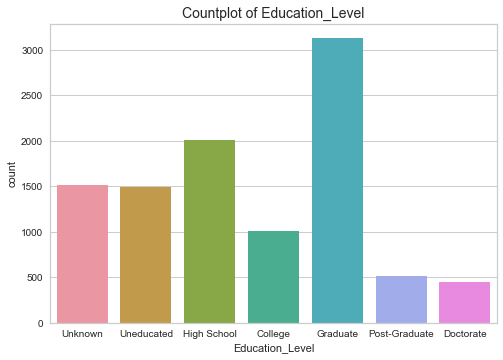

In [239]:
sns.countplot(x = 'Education_Level', data = data, order = ['Unknown','Uneducated', 'High School', 'College','Graduate','Post-Graduate','Doctorate'])
plt.title('Countplot of Education_Level', fontsize = 14)
plt.show()
#data['Education_Level'].value_counts()

The above chart shows the countplot of feature named **Educational_Level**. The x-axis represents the seven unique classes in this feature which can be ordered based on the sequence of educatin. The y-axis represents the count of customers falling for each class. Based on the above chart, most of the customers are graduates at 3128, while the two lowest classes are Post-Graduate and Doctorate having 516 and 451 customers apiece.

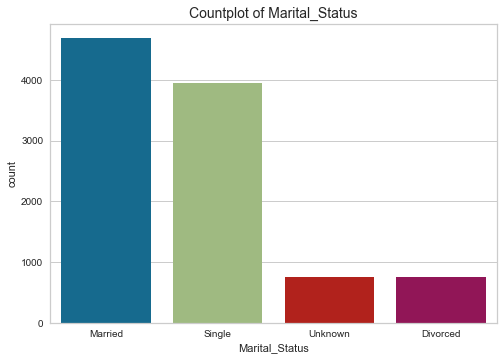

In [241]:
sns.countplot(x = 'Marital_Status', data = data)
plt.title('Countplot of Marital_Status', fontsize = 14)
plt.show()
#data['Marital_Status'].value_counts()

The above chart shows the countplot of feature named **Marital_Status**. The x-axis represents the four unique classes in this feature. The y-axis represents the count of customers falling for each class. Based on the above chart, the top two classes are Married and Single having 4687 and 3943 customers apiece.

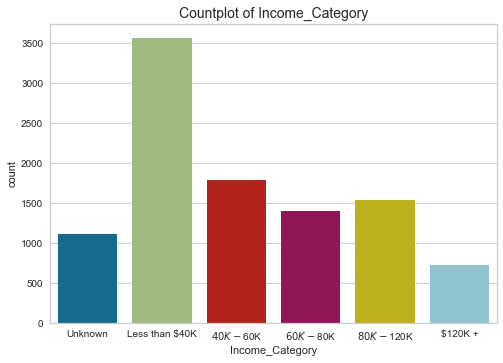

In [244]:
sns.countplot(x = 'Income_Category', data = data, order = ['Unknown','Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +'])
plt.title('Countplot of Income_Category', fontsize = 14)
plt.show()


The above chart shows the countplot of feature named **Income_Category**. The x-axis represents the five unique classes in this feature which can be ordered based on the values of the ranges. The y-axis represents the count of customers falling for each class. Based on the above chart, majority of the customers at 3561 have an income less than 40K , while only 727 customers have an income of more than 120K.

#### 6. Bivariate Analysis on Top Features against the Target Variable

**Bivariate analysis** is also another form of quantitative analysis. The basic goal is to describe the relationship of two features thru patterns from charting and conducting statistical tests.

Here we'll be investigating the mean of the top features against the values of our target variable using a barplot. Shown below is how to read the output of a barplot.

<img src="image/barplot.png" width="500" align="left">

<br />
<br />
<br />

A **barplot** is basically used to aggregate the categorical data according to its mean or average. To use this plot we choose a categorical column for the x-axis and a numerical column for the y-axis, and we see that it creates a plot taking the mean per categorical column. This chart is good at easily pinpointing if there's a difference of mean of the unique values of categorical feature.

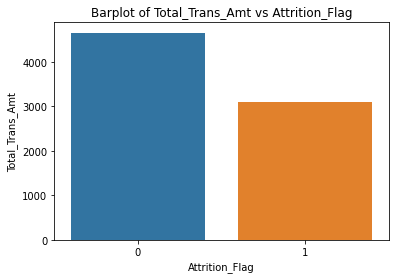

In [11]:
#Barplot
sns.barplot(x="Attrition_Flag", y='Total_Trans_Amt', data=data[numerical+target],ci = 0)
plt.title('Barplot of Total_Trans_Amt vs Attrition_Flag')
plt.show()

The above chart shows the barplot of our target variable named **Attrition_Flag** against **Total_Trans_Amt**. The x-axis represents the two unique values in our target variable where 1 stands for customer who closed their credit card account while 0 means otherwise. The y-axis represents the average total transaction amount. Based on the above chart, it shows that those who closed their account (see orange bar) have lesser average total transaction amount than those who didn't close their account(see blue bar). This makes sense since those who would most likely to close their account would not use their credit card that much. 

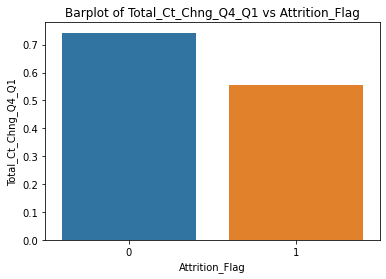

In [12]:
#Barplot
sns.barplot(x="Attrition_Flag", y='Total_Ct_Chng_Q4_Q1', data=data[numerical+target],ci = 0)
plt.title('Barplot of Total_Ct_Chng_Q4_Q1 vs Attrition_Flag')
plt.show()

The above chart shows the barplot of our target variable named **Attrition_Flag** against **Total_Ct_Chng_Q4_Q1**. The x-axis represents the two unique values in our target variable where 1 stands for customer who closed their credit card account while 0 means otherwise. The y-axis represents the average total transaction amount. Based on the above chart, it shows that those who closed their account (see orange bar) have lesser average total transaction from Q4 to Q1 than those who didn't close their account(see blue bar). This makes sense since those who would most likely to close their account would be expected to have a lesser usage of the credit card as their product subscription passes by. 

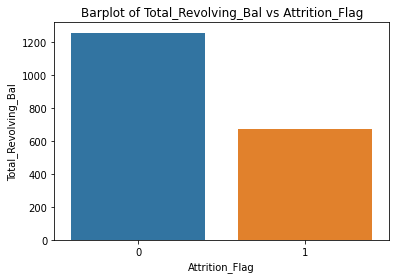

In [13]:
#Barplot
sns.barplot(x="Attrition_Flag", y='Total_Revolving_Bal', data=data[numerical+target],ci = 0)
plt.title('Barplot of Total_Revolving_Bal vs Attrition_Flag')
plt.show()

The above chart shows the barplot of our target variable named **Attrition_Flag** against **Total_Revolving_Bal**. The x-axis represents the two unique values in our target variable where 1 stands for customer who closed their credit card account while 0 means otherwise. The y-axis represents the average total revolving balance. Based on the above chart, it shows that those who closed their account (see orange bar) have lesser average total revolving balance than those who didn't close their account(see blue bar). This makes sense since those who would most likely to close their account are expected to have a lesser to no transaction within their account.

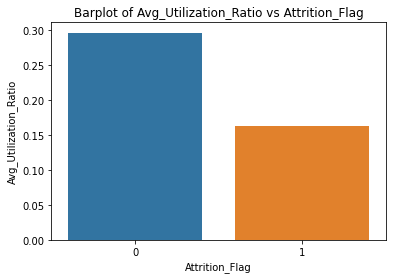

In [14]:
#Barplot
sns.barplot(x="Attrition_Flag", y='Avg_Utilization_Ratio', data=data[numerical+target],ci = 0)
plt.title('Barplot of Avg_Utilization_Ratio vs Attrition_Flag')
plt.show()


The above chart shows the barplot of our target variable named **Attrition_Flag** against **Avg_Utilization_Ratio**. The x-axis represents the two unique values in our target variable where 1 stands for customer who closed their credit card account while 0 means otherwise. The y-axis represents the average total revolving balance. Based on the above chart, it shows that those who closed their account (see orange bar) have lesser average utilization ratio at  than those who didn't close their account(see blue bar). This makes sense since those who would most likely to close their account are expected not to utilize the product.
 

## III. Data Preparation

In [67]:
data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,1,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,1,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,1,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [73]:
data['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [245]:
data['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [24]:
from pycaret.classification import *

In [76]:
clf1 = setup(data, target = 'Attrition_Flag',
             numeric_features = ['Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon'],
             ordinal_features = {'Education_Level' : ['Unknown','Uneducated', 'High School', 'College','Graduate','Post-Graduate','Doctorate'],
                    'Income_Category': ['Unknown','Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +']},
             session_id = 123,
             normalize = True,
             remove_multicollinearity = True, 
             multicollinearity_threshold = 0.7,
             remove_outliers = True)

,Description,Value
0,session_id,123
1,Target,Attrition_Flag
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(10127, 20)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,5
8,Ordinal Features,True
9,High Cardinality Features,False


In [77]:
best_model = compare_models(sort = 'Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9370,0.9692,0.7406,0.8569,0.7934,0.7565,0.7600,0.1250
ada,Ada Boost Classifier,0.9229,0.9504,0.7044,0.8040,0.7491,0.7039,0.7071,0.2190
gbc,Gradient Boosting Classifier,0.9323,0.9614,0.6980,0.8633,0.7710,0.7318,0.7381,0.5600
rf,Random Forest Classifier,0.9297,0.9571,0.6762,0.8669,0.7583,0.7181,0.7265,0.4970
dt,Decision Tree Classifier,0.8867,0.7952,0.6591,0.6537,0.6556,0.5878,0.5884,0.0490
qda,Quadratic Discriminant Analysis,0.9000,0.9210,0.6283,0.7274,0.6730,0.6144,0.6175,0.0350
et,Extra Trees Classifier,0.9229,0.9505,0.6046,0.8909,0.7187,0.6761,0.6940,0.3460
nb,Naive Bayes,0.8975,0.9016,0.5947,0.7317,0.6550,0.5957,0.6007,0.0420
lda,Linear Discriminant Analysis,0.8993,0.8984,0.5711,0.7569,0.6495,0.5922,0.6010,0.0470
knn,K Neighbors Classifier,0.9030,0.8933,0.5512,0.7961,0.6500,0.5960,0.6103,0.1580


Based on the above output, we choose the model outputted by **lightgbm** and **gbc**

**1st Model:** lightgbm

In [81]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9466,0.9797,0.8198,0.8505,0.8349,0.8030,0.8032
1,0.9392,0.9657,0.7658,0.8500,0.8057,0.7697,0.7712
2,0.9496,0.9752,0.7838,0.8969,0.8365,0.8069,0.8094
3,0.9272,0.9550,0.7182,0.8144,0.7633,0.7205,0.7225
4,0.9302,0.9591,0.6727,0.8706,0.7590,0.7189,0.7271
5,0.9584,0.9797,0.8000,0.9362,0.8627,0.8384,0.8420
6,0.9316,0.9635,0.7182,0.8404,0.7745,0.7345,0.7377
7,0.9421,0.9753,0.7273,0.8989,0.8040,0.7705,0.7764
8,0.9212,0.9678,0.6455,0.8353,0.7282,0.6830,0.6908
9,0.9242,0.9706,0.7545,0.7757,0.7650,0.7198,0.7199


In [123]:
lightgbm_data = predict_model(lightgbm, raw_score = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9372,0.9700,0.7409,0.8317,0.7837,0.7471,0.7488


Given the performance metrics in Train and Test data have no significant difference. There seems to be no sign of overfitting in the model. 

In [124]:
lightgbm_data

,Customer_Age,Dependent_count,Education_Level,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,...,Avg_Utilization_Ratio,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Unknown,Card_Category_Silver,Attrition_Flag,Label,Score_0,Score_1
0,-1.044406,-0.270333,1.0,0.774032,-0.335202,-0.413847,0.394770,1.206626,-0.945319,0.130381,...,-0.356047,0.0,0.0,0.0,0.0,0.0,0,0,0.9870,0.0130
1,-1.044406,-0.270333,4.0,1.415184,0.656000,-0.413847,0.659773,0.001332,-1.183968,-1.234100,...,-0.705320,1.0,0.0,0.0,0.0,0.0,0,0,0.9794,0.0206
2,0.077468,0.502608,1.0,0.774032,0.656000,-0.413847,1.919310,0.624293,0.720637,-0.296020,...,-0.759894,1.0,0.0,0.0,0.0,0.0,0,0,0.9875,0.0125
3,-2.540238,-1.816216,0.0,-0.508272,0.656000,-0.413847,-0.115945,-0.153792,1.266777,0.300941,...,-0.497939,0.0,0.0,0.0,0.0,0.0,0,0,0.9422,0.0578
4,1.822606,-1.043275,4.0,1.415184,3.629605,-1.317528,0.022509,-1.424336,-0.128404,-1.234100,...,-0.992743,1.0,0.0,0.0,1.0,0.0,0,1,0.1895,0.8105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3034,-1.916975,-1.816216,5.0,-0.508272,-0.335202,-2.221210,-0.519513,0.928386,-0.165119,0.727341,...,0.775451,0.0,0.0,0.0,0.0,0.0,0,0,0.9931,0.0069
3035,0.451426,1.275550,2.0,-1.149425,-0.335202,2.297196,0.893029,1.546422,0.045994,2.390302,...,-0.468833,1.0,0.0,1.0,0.0,0.0,0,0,0.9958,0.0042
3036,-0.171837,-0.270333,0.0,0.132880,1.647202,1.393515,0.863045,0.267260,-1.376724,0.258301,...,-0.690767,1.0,0.0,1.0,0.0,0.0,0,0,0.9972,0.0028
3037,-1.169059,-0.270333,1.0,0.132880,0.656000,0.489834,-0.079348,-0.198113,-1.092180,0.855261,...,-0.534322,0.0,0.0,1.0,0.0,0.0,0,0,0.9970,0.0030


In [127]:
print('Label = 0')
display(lightgbm_data[['Label','Score_1']].query('Label ==0').describe().T)
print('Label = 1')
display(lightgbm_data[['Label','Score_1']].query('Label ==1').describe().T)

Label = 0


,count,mean,std,min,25%,50%,75%,max
Label,2623.0,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000
Score_1,2623.0,0.040118,0.090551,0.0001,0.0011,0.0043,0.0237,0.4987


Label = 1


,count,mean,std,min,25%,50%,75%,max
Label,416.0,1.000000,0.000000,1.0000,1.000000,1.0000,1.00000,1.0000
Score_1,416.0,0.865525,0.143459,0.5003,0.790075,0.9235,0.98105,0.9991


In [122]:
evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [148]:
save_model(lightgbm,'lightgbm_model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['Dependent_count',
                                                           'Total_Relationship_Count',
                                                           'Months_Inactive_12_mon',
                                                           'Contacts_Count_12_mon'],
                                       target='Attrition_Flag',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(cat...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
   

**2nd Model:** gbc

In [83]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9392,0.9713,0.7658,0.8500,0.8057,0.7697,0.7712
1,0.9318,0.9585,0.7027,0.8571,0.7723,0.7326,0.7376
2,0.9392,0.9722,0.7117,0.8977,0.7940,0.7588,0.7659
3,0.9272,0.9454,0.7000,0.8280,0.7586,0.7161,0.7196
4,0.9227,0.9475,0.6273,0.8625,0.7263,0.6826,0.6944
5,0.9480,0.9724,0.7273,0.9412,0.8205,0.7907,0.7997
6,0.9168,0.9496,0.6273,0.8214,0.7113,0.6637,0.6720
7,0.9495,0.9691,0.7455,0.9318,0.8283,0.7991,0.8059
8,0.9198,0.9599,0.6364,0.8333,0.7216,0.6758,0.6841
9,0.9287,0.9683,0.7364,0.8100,0.7714,0.7293,0.7305


In [150]:
gbc_data = predict_model(gbc,raw_score = True )
gbc_data

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9355,0.9635,0.7131,0.8430,0.7726,0.7354,0.7389


,Customer_Age,Dependent_count,Education_Level,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,...,Avg_Utilization_Ratio,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Unknown,Card_Category_Silver,Attrition_Flag,Label,Score_0,Score_1
0,-1.044406,-0.270333,1.0,0.774032,-0.335202,-0.413847,0.394770,1.206626,-0.945319,0.130381,...,-0.356047,0.0,0.0,0.0,0.0,0.0,0,0,0.9834,0.0166
1,-1.044406,-0.270333,4.0,1.415184,0.656000,-0.413847,0.659773,0.001332,-1.183968,-1.234100,...,-0.705320,1.0,0.0,0.0,0.0,0.0,0,0,0.9074,0.0926
2,0.077468,0.502608,1.0,0.774032,0.656000,-0.413847,1.919310,0.624293,0.720637,-0.296020,...,-0.759894,1.0,0.0,0.0,0.0,0.0,0,0,0.9557,0.0443
3,-2.540238,-1.816216,0.0,-0.508272,0.656000,-0.413847,-0.115945,-0.153792,1.266777,0.300941,...,-0.497939,0.0,0.0,0.0,0.0,0.0,0,0,0.9649,0.0351
4,1.822606,-1.043275,4.0,1.415184,3.629605,-1.317528,0.022509,-1.424336,-0.128404,-1.234100,...,-0.992743,1.0,0.0,0.0,1.0,0.0,0,1,0.2123,0.7877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3034,-1.916975,-1.816216,5.0,-0.508272,-0.335202,-2.221210,-0.519513,0.928386,-0.165119,0.727341,...,0.775451,0.0,0.0,0.0,0.0,0.0,0,0,0.9943,0.0057
3035,0.451426,1.275550,2.0,-1.149425,-0.335202,2.297196,0.893029,1.546422,0.045994,2.390302,...,-0.468833,1.0,0.0,1.0,0.0,0.0,0,0,0.9696,0.0304
3036,-0.171837,-0.270333,0.0,0.132880,1.647202,1.393515,0.863045,0.267260,-1.376724,0.258301,...,-0.690767,1.0,0.0,1.0,0.0,0.0,0,0,0.9805,0.0195
3037,-1.169059,-0.270333,1.0,0.132880,0.656000,0.489834,-0.079348,-0.198113,-1.092180,0.855261,...,-0.534322,0.0,0.0,1.0,0.0,0.0,0,0,0.9848,0.0152


Given the performance metrics in Train and Test data have no significant difference. There seems to be no sign of overfitting in the model. 

In [151]:
display(gbc_data[['Label','Score_1']].query('Label ==0').describe().T)
display(gbc_data[['Label','Score_1']].query('Label ==1').describe().T)

,count,mean,std,min,25%,50%,75%,max
Label,2644.0,0.000000,0.000000,0.0000,0.0000,0.0000,0.000000,0.0000
Score_1,2644.0,0.063284,0.095337,0.0015,0.0112,0.0241,0.063225,0.4991


,count,mean,std,min,25%,50%,75%,max
Label,395.0,1.000000,0.000000,1.000,1.00000,1.0000,1.00000,1.0000
Score_1,395.0,0.826121,0.140386,0.501,0.72785,0.8617,0.94905,0.9991


In [87]:
evaluate_model(gbc)

<Figure size 576x396 with 0 Axes>

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

In [149]:
save_model(gbc,'gbc_model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['Dependent_count',
                                                           'Total_Relationship_Count',
                                                           'Months_Inactive_12_mon',
                                                           'Contacts_Count_12_mon'],
                                       target='Attrition_Flag',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(cat...
                                             learning_rate=0.1, loss='deviance',
                                             max_depth=3, max_features=None,

# Deployment

In [158]:
import pickle as Pickle
lightgbm_mod = load_model('lightgbm_model')
gbc_mod = load_model('gbc_model')

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


In [186]:
test = data.drop(['Attrition_Flag'], axis=1).iloc[0]
test = pd.DataFrame(test).transpose()

In [187]:
pd.DataFrame(test).transpose()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061


In [189]:
result_frame = predict_model(lightgbm_mod, data=test, raw_score = True)
result = result_frame['Score_1']

In [190]:
result

0    0.0002
Name: Score_1, dtype: float64

In [203]:
import json

def np_encoder(object):
    if isinstance(object, np.generic):
        return object.item()
    
r = test.to_dict(orient='records')[0]
r = json.dumps(r,default=np_encoder)
loaded_r = json.loads(r)

<class 'str'>


In [79]:
#Here we read again the pickle file and v_limits
import json
lightgbm_mod = load_model('lightgbm_model')
gbc_mod = load_model('gbc_model')

In [80]:
def check_limits(sample,value_limits):
    #sample = json.loads(sample)
    output={}
    for i in value_limits.keys():
        if sample[i] > value_limits[i][1]:
            output[i] = value_limits[i][1]
        elif sample[i] < value_limits[i][0]:
            output[i] = value_limits[i][0]
        else:
            output[i] = sample[i]
    return output, np.array(list(output.values())).reshape(1,-1)

def pipeline_predict(data, value_limits, pipeline, threshold):
    x, y = check_limits(data,value_limits)
    predict_proba = pipeline.predict_proba(y)[0][1]
    if predict_proba >= threshold:
        result = 1
    else: 
        result = 0
    return predict_proba, result

* The **check_limits** function basically does the checking of values of input features if it's within the allowable range from the value limits file. In the case that it's not, it will replace the value accordingly based on the value limits recorded.
* The **pipeline_predict** function makes use of the check_limits for preprocessing, makes use of the pickle file for model prediction of the probability, and lastly, comparison of the outputted probability to the threshold for processed prediction.

In [81]:
from flask import Flask, request, jsonify, render_template
import os
import json

app = Flask(__name__)
@app.route('/', methods=['GET','POST'])
def index():
    data = request.json
    predict_proba, y = pipeline_predict(data, v_limits, model, 0.26)
    result = {'predict_proba':predict_proba, 'predicted_y': y}
    return jsonify(result)

@app.route('/batch/', methods=['GET','POST'])
def index_():
    result = {}
    data = request.json
    for i in data.keys():
        predict_proba, y = pipeline_predict(data[i], v_limits, model, 0.26)
        result_ = {'predict_proba':predict_proba, 'predicted_y': y}
        result[i] = result_
    return jsonify(result) #jsonify(result)
    
if __name__=="__main__":
    app.run(host=os.getenv('IP', '0.0.0.0'),
            port=int(os.getenv('PORT', 5555)), debug = False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:5555/ (Press CTRL+C to quit)
127.0.0.1 - - [29/Mar/2021 17:01:07] "POST /batch/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Mar/2021 17:01:17] "POST /batch/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Mar/2021 17:01:25] "POST /batch/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Mar/2021 17:01:32] "POST /batch/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Mar/2021 17:01:42] "POST /batch/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Mar/2021 17:01:56] "POST /batch/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Mar/2021 17:02:15] "POST /batch/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Mar/2021 17:02:22] "POST /batch/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Mar/2021 17:02:26] "POST /batch/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Mar/2021 17:02:33] "POST /batch/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Mar/2021 17:02:43] "POST /batch/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Mar/2021 17:02:55] "POST /batch/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Mar/2021 17:03:09] "POST /batch/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Mar/2021 17:03:17] "POST /batch/ HTTP/1.1" 200 -
127.